In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

In [5]:
path2lmplog = "/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/depth15/0deg_1000eV"

with open(os.path.join(path2lmplog, 'log.lammps'), "r") as f:
    lines = [s.strip() for s in f.readlines()]

In [7]:
for l in lines:
    if "Step        Atoms       v_nlayer      c_zinsert      v_ninsert         Temp          TotEng        c_mclus" in l:
        print(l)
        break

Step        Atoms       v_nlayer      c_zinsert      v_ninsert         Temp          TotEng        c_mclus


In [10]:
# get index of the line which has "step"

start_word = "Step        Atoms       v_nlayer      c_zinsert      v_ninsert         Temp          TotEng        c_mclus"
start_idx_list = [i for i, l in enumerate(lines) if start_word in l]

end_word = "Loop time of"
end_idx_list = [i for i, l in enumerate(lines) if end_word in l]

In [11]:
start_idx_list[:10], end_idx_list[:10]

([557, 601, 658, 715, 772, 829, 886, 943, 1008, 1065],
 [559, 623, 680, 737, 794, 851, 908, 965, 1030, 1087])

In [44]:
blocks = []
for start_idx, end_idx in zip(start_idx_list, end_idx_list):
    block = lines[start_idx+1:end_idx]
    # remove line which has NNP EW or WARNING
    block = [l for l in block if "NNP EW" not in l and "WARNING" not in l]
    block = [l.split() for l in block]
    block = np.array(block, dtype=float)
    blocks.append(block)

blocks = blocks[1:]
blocks = np.array(blocks)
blocks = np.vstack(blocks)

In [45]:
timestep_df = pd.DataFrame(blocks, columns=["step", "atoms", "v_nlayer", "c_zinsert", "v_ninsert", "Temp", "TotEng", "c_mclus"])

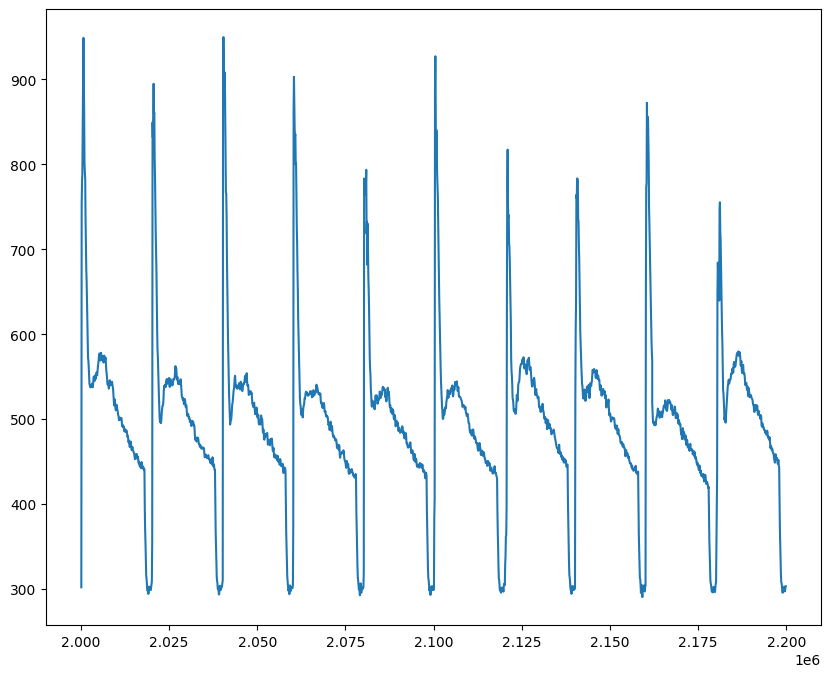

In [54]:
extracted_time_df = timestep_df.query("2000000 < step < 2200000")

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(extracted_time_df["step"], extracted_time_df["Temp"])